The martensite start temperature is: 292.48 °C
Cγ: 1.04 %
Maximun retained austenite fraction: 39.053 %
Optimal quenching temperature: 207 °C


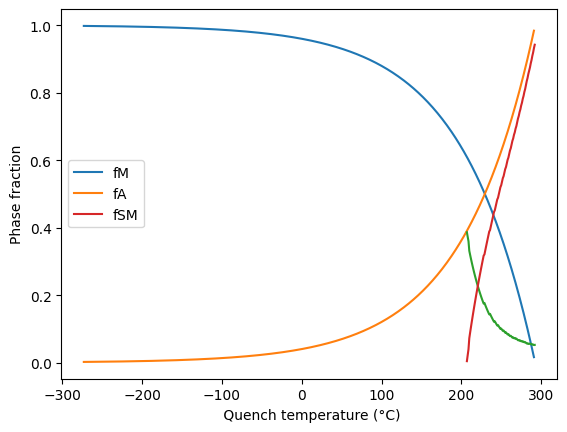

In [7]:
#Necesary libraries
import numpy as np
import math as mt
import matplotlib.pyplot as plt
###############################################################################################

#Introduce the steel composition
C=0.41
Si=1.27
Mn=1.30
Ni=1.01
Cr=0.56
Mo=0
Al=0
###############################################################################################

#Martensite start temperature (You can insert the most suitable equation into your project without changing the variable name Ms1)

Ms1= 539-423*C-7.5*Si-30.4*Mn-17.1*Ni-12.1*Cr-7.5*Mo+30*Al
#Ms1_1= 457.9-335.1*C-34.5*Mn-13.1*Cr-10.7*Mo+11.67*mt.log(16.2)
###############################################################################################

#Input parameters
TC=400 #Temperature in C°
###############################################################################################

#Fractions of austenite and martensite using Koistinen-Marburger relationship
TM=np.arange(-273,round(Ms1),1)
TM_list=TM.tolist()
FM1=[]
j=0
while j<len(TM):
  KM1=1-mt.exp(-0.011*(Ms1-TM[j]))
  FM1.append(KM1)

  if j>len(TM):
    break
  j=j+1
FA1=[1- value for value in FM1]

plt.plot(TM_list,FM1, label='fM')
plt.plot(TM_list,FA1, label='fA')
###############################################################################################

#CCE process

k=0
Av=[]
while k<len(FA1):
  Cm=C/100
  Xc_alloy=(Cm/12.01)/((Cm/12.01)+((1-Cm)/55.84))
  N=FA1[k]*(1-Xc_alloy)
  Tk=TC+273.15
  RT=Tk*8.314

  A= np.linspace(0.001,0.06,591)
  XA= (A/12.01)/((A/12.01)+((1-A)/55.84))

  i=0
  while i<len(XA):
    XM=(XA[i]/mt.exp((76789-43.8*Tk-(169105-120.4*Tk)*XA[i])/RT))-((Xc_alloy-N*XA[i]-Xc_alloy*XA[i])/(1-N-XA[i]))
    if XM >0:
      break
    Ap=A[i]*100
    Av.append(Ap)
    i=i+1

  #New MS temperature (Due to the partitioning process)
  C2=Ap
  Ms2= 539-423*C2-7.5*Si-30.4*Mn-17.1*Ni-12.1*Cr-7.5*Mo+30*Al
  #Ms2= 457.9-335.1*C2-34.5*Mn-13.1*Cr-10.7*Mo+11.67*mt.log(16.2)

  if Ms2>25: #At this stage, the optimal quenching temperature will be obtained
    break
  k=k+1
###############################################################################################

# New retained austenite fraction

TA2=np.arange(TM[k],Ms1,1)
TA2_lst=TA2.tolist()
FA2=[]

h=0
while h<len(TA2):
  KM3=mt.exp(-0.011*(Ms1-TA2[h]))
  FA2.append(KM3)

  if h>len(TA2):
    break
  h=h+1
###
FA3=[]

r=0
while r<len(FA2):
  A2= np.linspace(0.001,0.06,591)
  XA2= (A2/12.01)/((A2/12.01)+((1-A2)/55.84))
  N2=FA2[r]*(1-Xc_alloy)
  t=0
  while t<len(XA2):
    XM2=(XA2[t]/mt.exp((76789-43.8*Tk-(169105-120.4*Tk)*XA2[t])/RT))-((Xc_alloy-N2*XA2[t]-Xc_alloy*XA2[t])/(1-N2-XA2[t]))
    if XM2>0:
      break
    Ap1=A2[t]
    C3=Ap1*100
    t=t+1
  Ms3=539-423*C3-7.5*Si-30.4*Mn-17.1*Ni-12.1*Cr-7.5*Mo+30*Al
  #Ms3= 457.9-335.1*C3-34.5*Mn-13.1*Cr-10.7*Mo+11.67*mt.log(16.2)
  KM4=mt.exp(-0.011*(Ms3-25))
  KMSM=1-mt.exp(-0.011*(Ms3-25))
  FA3.append(KM4)

  if Ms3>Ms1:
    break
  r=r+1
###############################################################################################

# Secondary martensite
FSM=[]
g=0
while g<len(TA2):
  KM5=1-mt.exp(-0.011*(Ms1-TA2[g]))
  FSM.append(KM5)
  if g>len(TA2):
    break
  g=g+1
if len(FA2) != len(FA3):
  print("The lists aren'the same length ")
else:
  FAR=[a*b for a, b in zip(FA2, FA3)]
  FSM2=[(1-a-b) for a, b in zip(FSM,FAR)]
###############################################################################################

#Plots

plt.plot(TA2,FAR)
plt.plot(TA2,FSM2, label='fSM')
#
Unt=5 #Units number
print("The martensite start temperature is:", format(Ms1,f".{Unt}",),"°C")
print("Cγ:",format(Ap,f".{Unt}"),"%")
print("Maximun retained austenite fraction:",format(FA1[k]*100,f".{Unt}"),"%")
print("Optimal quenching temperature:",TM[k],"°C")



plt.xlabel(' Quench temperature (°C)')
plt.ylabel('Phase fraction')
plt.legend()
plt.show()
